# Exploratory Data Analysis

In [349]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1) Variable Identification

##### Reading the Dataset

In [350]:
auto = pd.read_csv('Automobile_data.csv')
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


##### Checking for Datatypes (make sure all should be numeric)

In [351]:
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### 2) Missing values treatment

In [352]:
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [353]:
#  Function to remove special symbol in form of missing data and replacing it with mean value.
def symbol_remover(symbol,features):
    for feature_name in features:
        mean_value = auto[auto[feature_name]!=symbol][feature_name].astype(float).mean()
        auto[feature_name] = (np.where(auto[feature_name]==symbol,mean_value,auto[feature_name])).astype(float)
    

In [354]:
features_list = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
symbol_remover('?',features_list)

In [355]:
cleanup_nums = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [356]:
auto.replace(cleanup_nums, inplace=True)


In [357]:
auto['num-of-doors'] = np.where(auto['num-of-doors']=='?',4,auto['num-of-doors'])

In [358]:
auto['num-of-doors'] = auto['num-of-doors'].astype('category')
auto['num-of-cylinders'] = auto['num-of-cylinders'].astype('category')

In [359]:
auto.dtypes

symboling               int64
normalized-losses     float64
make                   object
fuel-type              object
aspiration             object
num-of-doors         category
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders     category
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object

### 3) Univariate Analysis

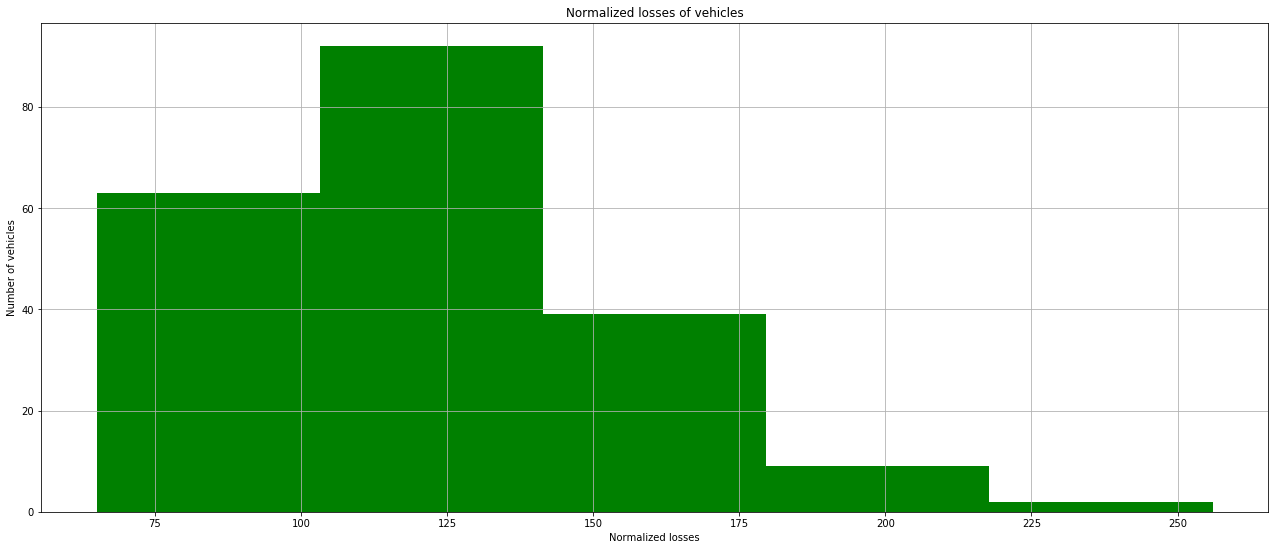

In [360]:
auto['normalized-losses'].hist(bins=5,color='green');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

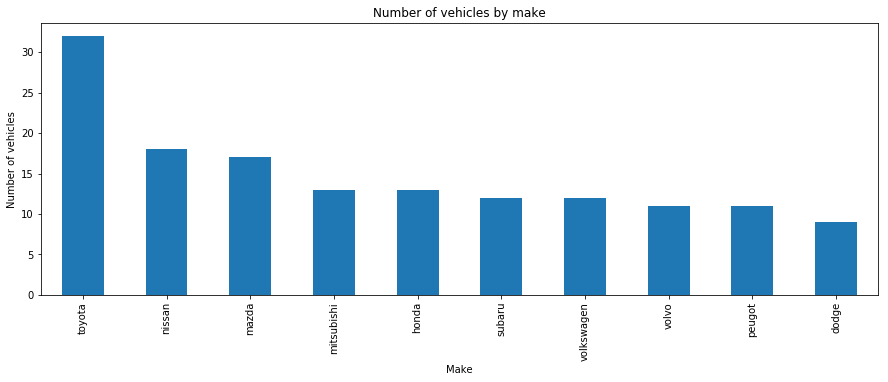

In [361]:
auto.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

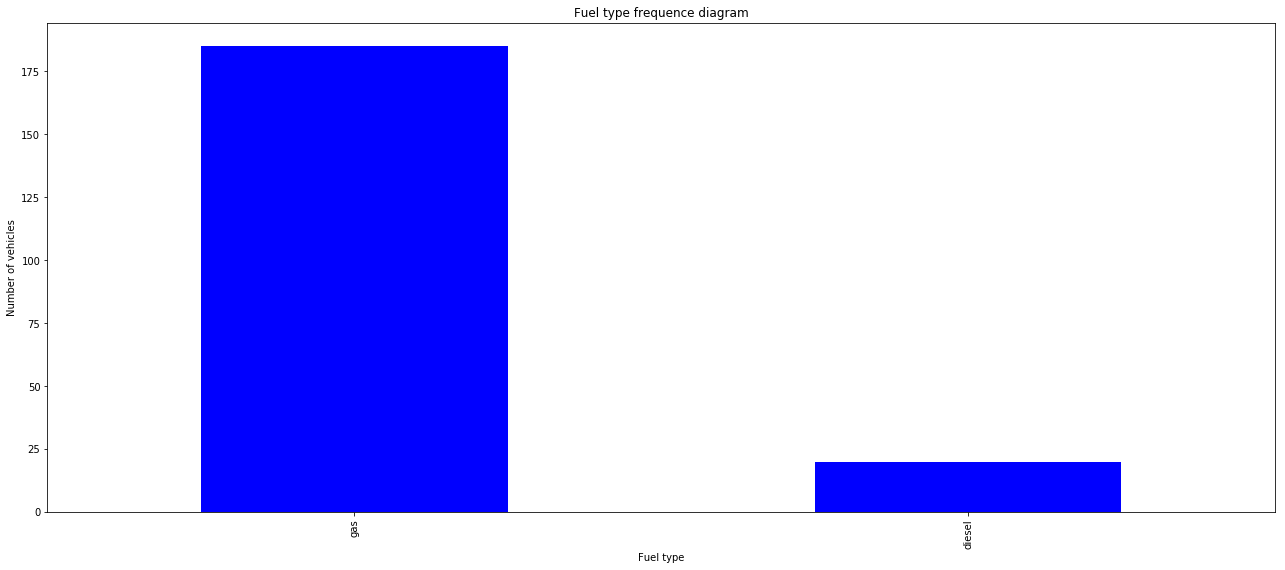

In [362]:
auto['fuel-type'].value_counts().plot(kind='bar',color='blue')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

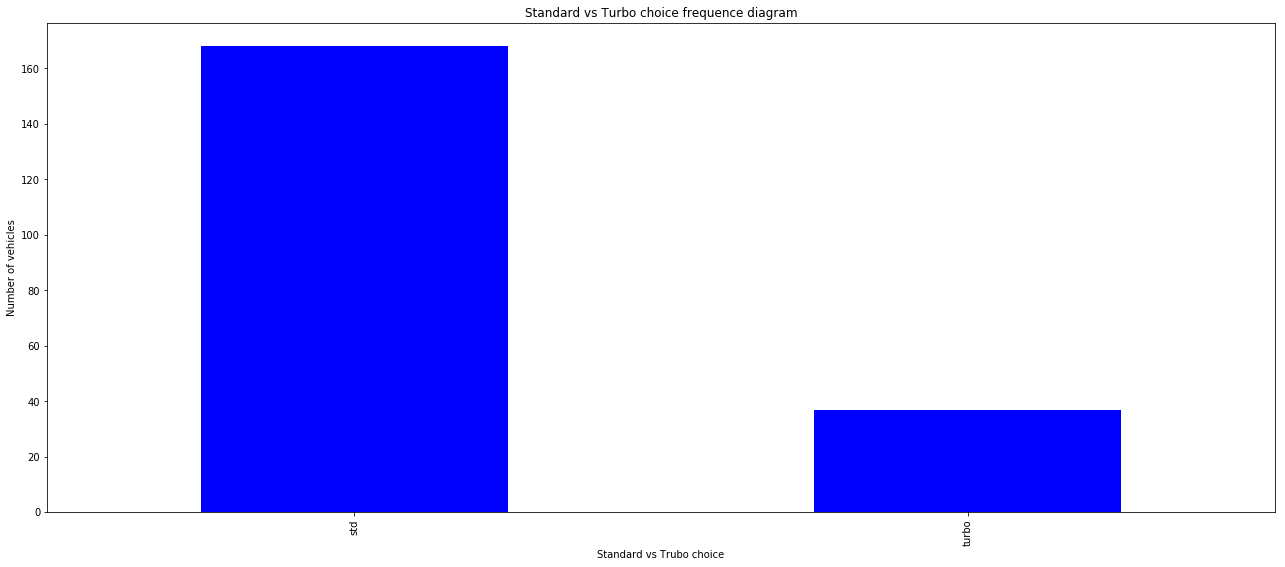

In [363]:
auto['aspiration'].value_counts().plot(kind='bar',color='blue')
plt.title("Standard vs Turbo choice frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Standard vs Trubo choice');

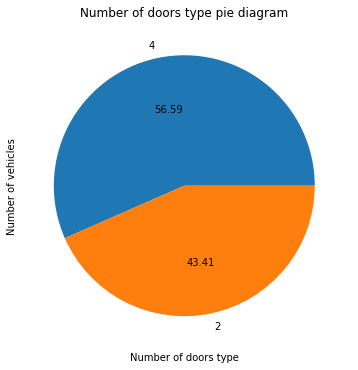

In [364]:
auto['num-of-doors'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Number of doors type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors type');

Text(0, 0.5, 'Number of vehicles')

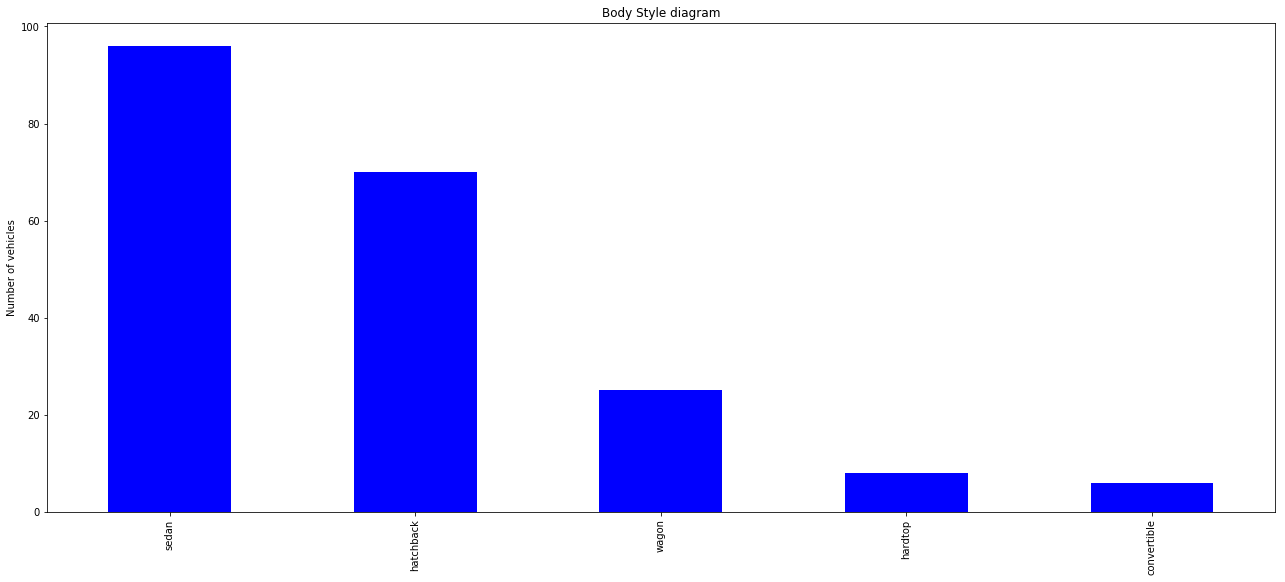

In [365]:
auto['body-style'].value_counts().plot(kind='bar',color='blue')
plt.title("Body Style diagram")
plt.ylabel('Number of vehicles')

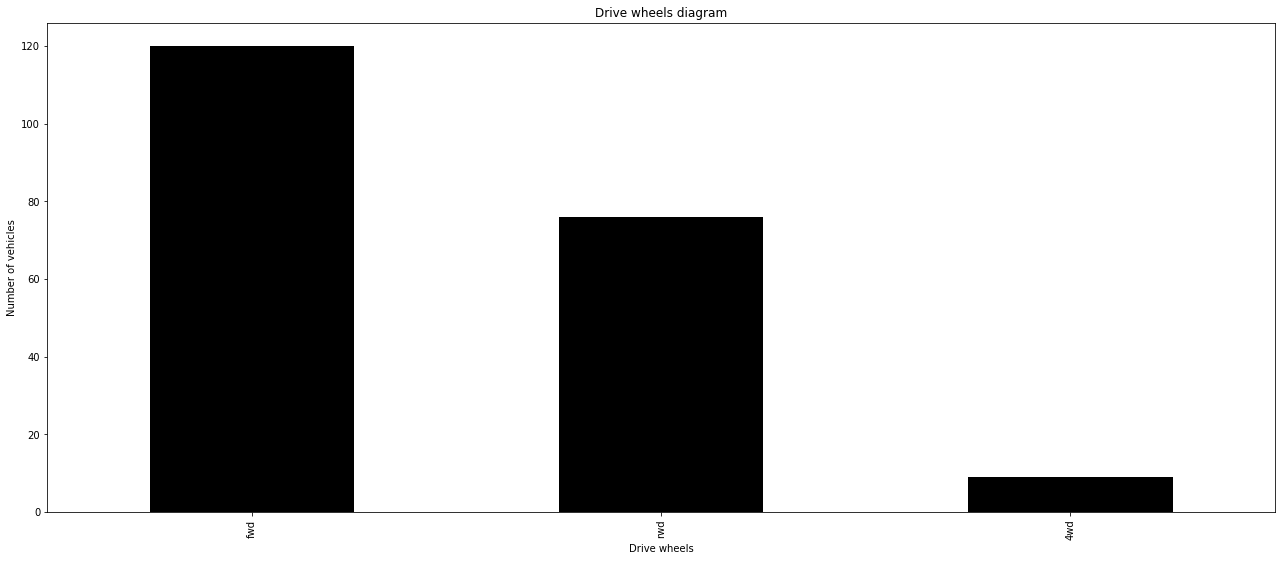

In [366]:
auto['drive-wheels'].value_counts().plot(kind='bar',color='black')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

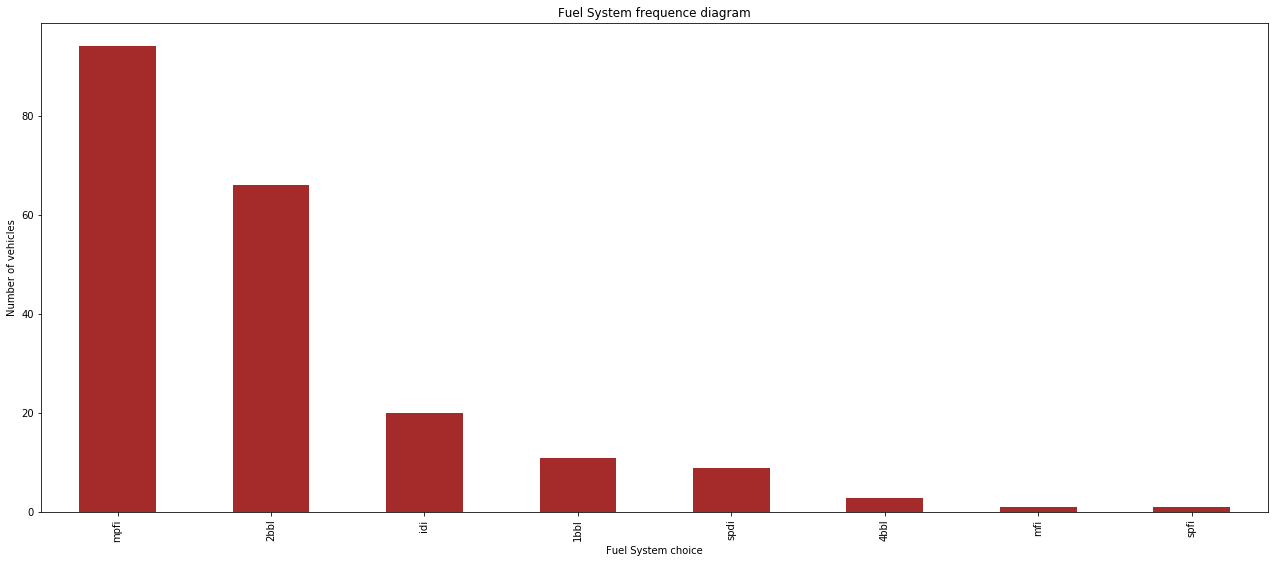

In [367]:
auto['fuel-system'].value_counts().plot(kind='bar',color='brown')
plt.title("Fuel System frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel System choice');

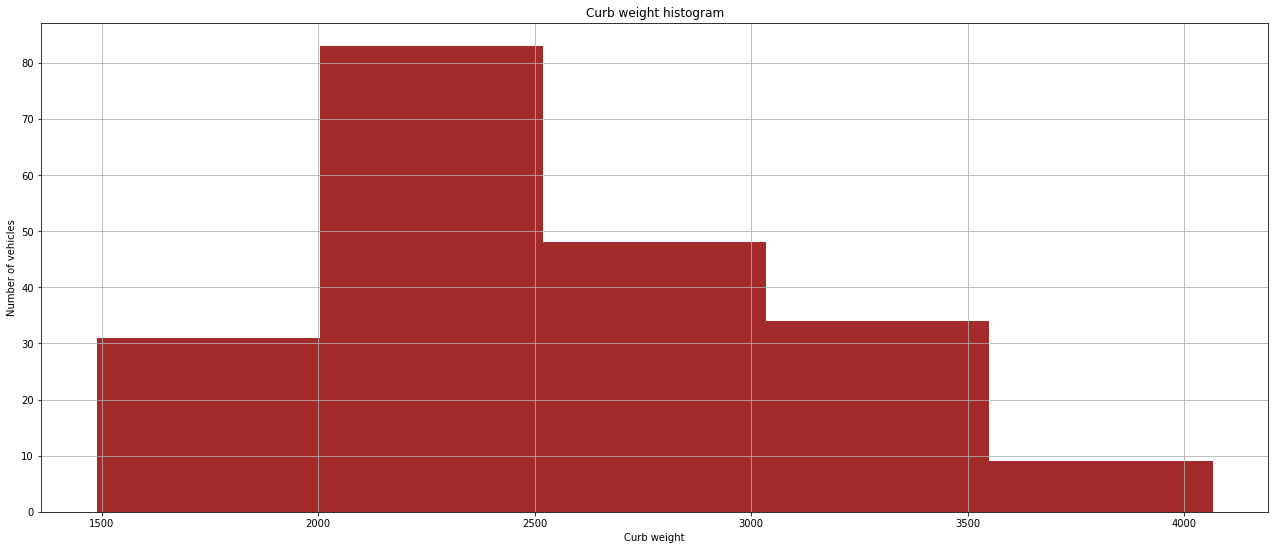

In [368]:
auto['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

### 4) Bi-variate Analysis

In [369]:
numeric_df = auto.select_dtypes(exclude= object)

In [370]:
numeric_df

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.00,111.0,5000.0,21,27,13495.000000
1,3,122.0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.00,111.0,5000.0,21,27,16500.000000
2,1,122.0,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.00,154.0,5000.0,19,26,16500.000000
3,2,164.0,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.00,102.0,5500.0,24,30,13950.000000
4,2,164.0,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.00,115.0,5500.0,18,22,17450.000000
5,2,122.0,2,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.40,8.50,110.0,5500.0,19,25,15250.000000
6,1,158.0,4,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.40,8.50,110.0,5500.0,19,25,17710.000000
7,1,122.0,4,105.8,192.7,71.4,55.7,2954,5,136,3.19,3.40,8.50,110.0,5500.0,19,25,18920.000000
8,1,158.0,4,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.40,8.30,140.0,5500.0,17,20,23875.000000
9,0,122.0,2,99.5,178.2,67.9,52.0,3053,5,131,3.13,3.40,7.00,160.0,5500.0,16,22,13207.129353


In [371]:
numeric_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


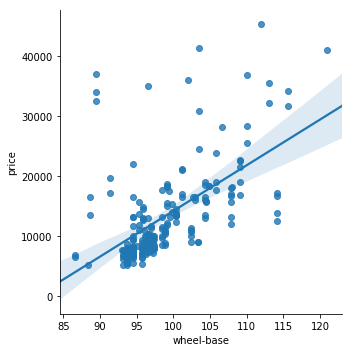

In [372]:
# Scatter plot of price and Wheel base:
sns.lmplot(data=numeric_df,x = 'wheel-base',y = 'price')

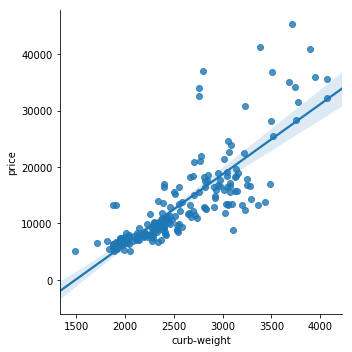

In [373]:
# Scatter plot of price and Curb Weight:
sns.lmplot(data=numeric_df,x ='curb-weight',y = 'price')

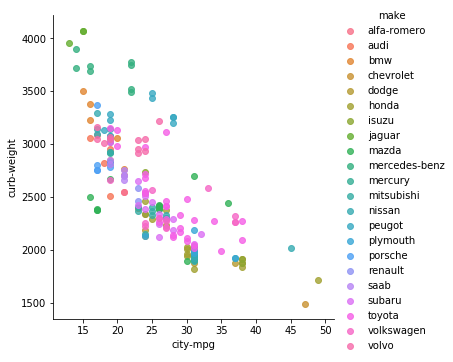

In [374]:
sns.lmplot('city-mpg',"curb-weight", auto, hue="make", fit_reg=False);

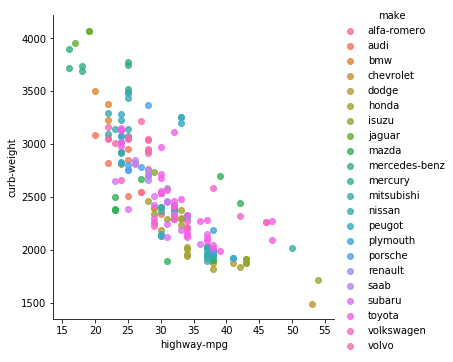

In [375]:
sns.lmplot('highway-mpg',"curb-weight", auto, hue="make", fit_reg=False);

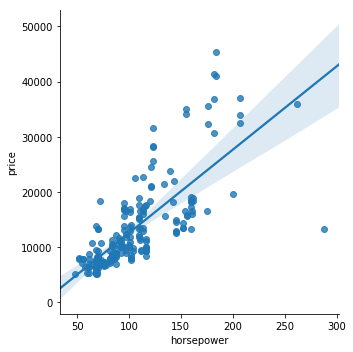

In [376]:
# Scatter plot of price and Horsepower:
sns.lmplot(data=numeric_df,x ='horsepower',y = 'price')

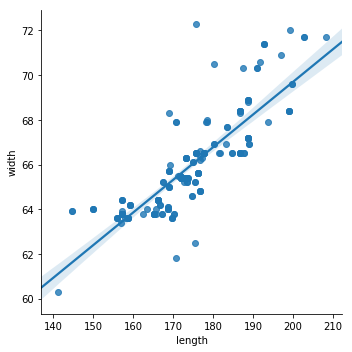

In [377]:
# Scatter plot of length and width:
sns.lmplot(data=numeric_df,x ='length',y = 'width')

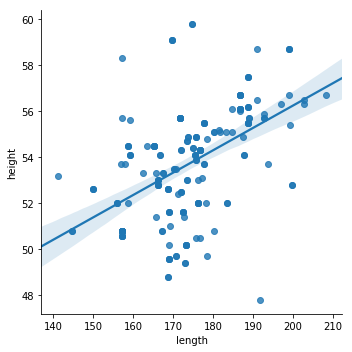

In [378]:
# Scatter plot of length and height:
sns.lmplot(data=numeric_df,x ='length',y = 'height')

### 5) Outlier treatment

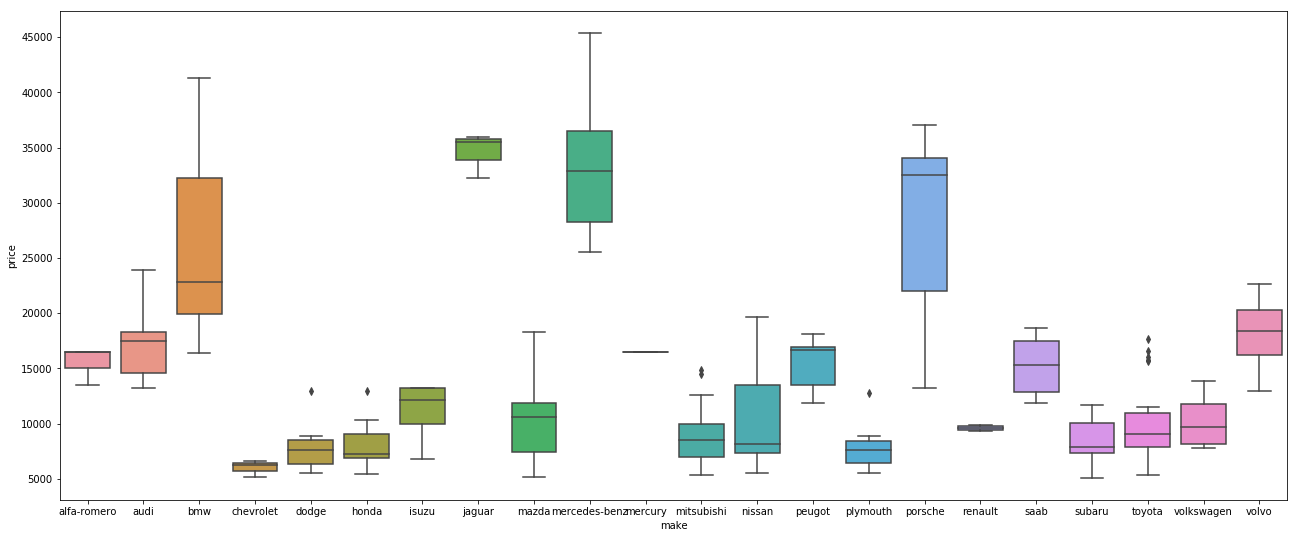

In [379]:
plt.rcParams['figure.figsize']=(22,9)
sns.boxplot(data=auto,x='make',y='price');

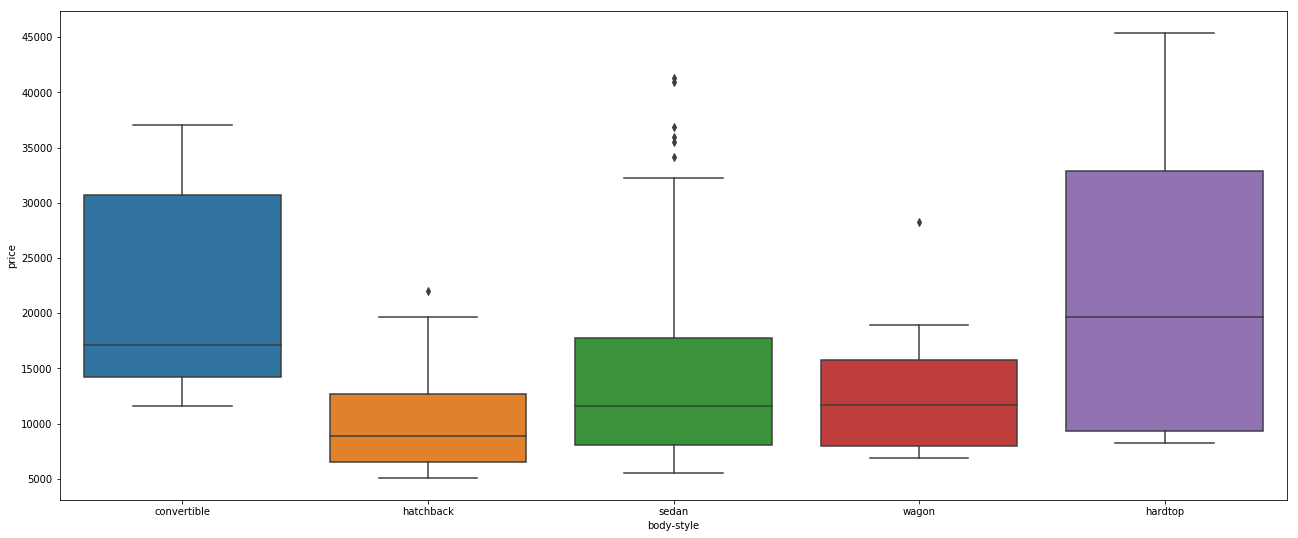

In [380]:
plt.rcParams['figure.figsize']=(22,9)
sns.boxplot(data=auto,x='body-style',y='price');

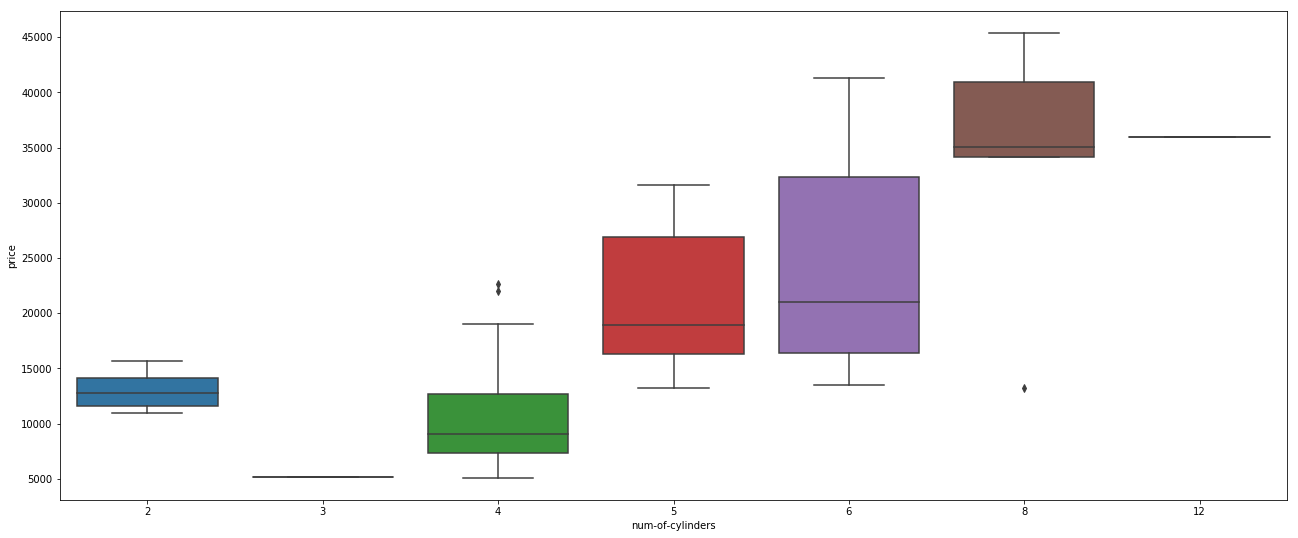

In [381]:
plt.rcParams['figure.figsize']=(22,9)
sns.boxplot(data=auto,x='num-of-cylinders',y='price');

In [382]:
auto.dtypes

symboling               int64
normalized-losses     float64
make                   object
fuel-type              object
aspiration             object
num-of-doors         category
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders     category
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object

### 6) Variable transformation

In [383]:
# Converting Fuel-type to numeric using One-hot encoding
dummy = pd.get_dummies(auto['fuel-type'],prefix='fuel-type')
auto = pd.concat([auto,dummy],1)

In [384]:
auto = auto.drop(['fuel-type'],1)

In [385]:
# Converting aspiration to numeric using One-hot encoding
dummy_asp = pd.get_dummies(auto['aspiration'],prefix='aspiration')
auto = pd.concat([auto,dummy_asp],1)

In [386]:
auto = auto.drop(['aspiration'],1)

In [387]:
auto['area'] = auto['length']*auto['width']*auto['height']

In [388]:
auto = auto.drop(['length','width','height'],1)

In [389]:
auto.dtypes

symboling               int64
normalized-losses     float64
make                   object
num-of-doors         category
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
curb-weight             int64
engine-type            object
num-of-cylinders     category
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
fuel-type_diesel        uint8
fuel-type_gas           uint8
aspiration_std          uint8
aspiration_turbo        uint8
area                  float64
dtype: object

In [390]:
auto['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [391]:
# Converting drive-wheels to numeric using One-hot encoding
dummy_dw = pd.get_dummies(auto['drive-wheels'],prefix='drive-wheels')
auto = pd.concat([auto,dummy_dw],1)

In [392]:
auto = auto.drop(['drive-wheels'],1)

In [393]:
auto.head()

,symboling,normalized-losses,make,num-of-doors,body-style,engine-location,wheel-base,curb-weight,engine-type,num-of-cylinders,...,highway-mpg,price,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,area,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,3,122.0,alfa-romero,2,convertible,front,88.6,2548,dohc,4,...,27,13495.0,0,1,1,0,528019.904,0,0,1
1,3,122.0,alfa-romero,2,convertible,front,88.6,2548,dohc,4,...,27,16500.0,0,1,1,0,528019.904,0,0,1
2,1,122.0,alfa-romero,2,hatchback,front,94.5,2823,ohcv,6,...,26,16500.0,0,1,1,0,587592.640,0,0,1
3,2,164.0,audi,4,sedan,front,99.8,2337,ohc,4,...,30,13950.0,0,1,1,0,634816.956,0,1,0
4,2,164.0,audi,4,sedan,front,99.4,2824,ohc,5,...,22,17450.0,0,1,1,0,636734.832,1,0,0


In [394]:
auto.dtypes

symboling               int64
normalized-losses     float64
make                   object
num-of-doors         category
body-style             object
engine-location        object
wheel-base            float64
curb-weight             int64
engine-type            object
num-of-cylinders     category
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
fuel-type_diesel        uint8
fuel-type_gas           uint8
aspiration_std          uint8
aspiration_turbo        uint8
area                  float64
drive-wheels_4wd        uint8
drive-wheels_fwd        uint8
drive-wheels_rwd        uint8
dtype: object

In [395]:
auto['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [396]:
auto['OHC_status'] = np.where(auto['engine-type'].str.contains('ohc'),1,0)

In [397]:
auto['OHC_status'].value_counts()

1    189
0     16
Name: OHC_status, dtype: int64

In [398]:
auto = auto.drop(['engine-type'],1)

In [399]:
auto.head()

,symboling,normalized-losses,make,num-of-doors,body-style,engine-location,wheel-base,curb-weight,num-of-cylinders,engine-size,...,price,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,area,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,OHC_status
0,3,122.0,alfa-romero,2,convertible,front,88.6,2548,4,130,...,13495.0,0,1,1,0,528019.904,0,0,1,1
1,3,122.0,alfa-romero,2,convertible,front,88.6,2548,4,130,...,16500.0,0,1,1,0,528019.904,0,0,1,1
2,1,122.0,alfa-romero,2,hatchback,front,94.5,2823,6,152,...,16500.0,0,1,1,0,587592.640,0,0,1,1
3,2,164.0,audi,4,sedan,front,99.8,2337,4,109,...,13950.0,0,1,1,0,634816.956,0,1,0,1
4,2,164.0,audi,4,sedan,front,99.4,2824,5,136,...,17450.0,0,1,1,0,636734.832,1,0,0,1


In [400]:
auto.dtypes

symboling               int64
normalized-losses     float64
make                   object
num-of-doors         category
body-style             object
engine-location        object
wheel-base            float64
curb-weight             int64
num-of-cylinders     category
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
fuel-type_diesel        uint8
fuel-type_gas           uint8
aspiration_std          uint8
aspiration_turbo        uint8
area                  float64
drive-wheels_4wd        uint8
drive-wheels_fwd        uint8
drive-wheels_rwd        uint8
OHC_status              int32
dtype: object

In [401]:
auto['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [402]:
auto['Fuel_system_type'] = np.where(auto['fuel-system'].str.contains('bbl'),0,1)

In [403]:
auto['Fuel_system_type'].value_counts()

1    125
0     80
Name: Fuel_system_type, dtype: int64

In [404]:
auto = auto.drop(['fuel-system'],1)

In [405]:
auto.head()

,symboling,normalized-losses,make,num-of-doors,body-style,engine-location,wheel-base,curb-weight,num-of-cylinders,engine-size,...,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,area,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,OHC_status,Fuel_system_type
0,3,122.0,alfa-romero,2,convertible,front,88.6,2548,4,130,...,0,1,1,0,528019.904,0,0,1,1,1
1,3,122.0,alfa-romero,2,convertible,front,88.6,2548,4,130,...,0,1,1,0,528019.904,0,0,1,1,1
2,1,122.0,alfa-romero,2,hatchback,front,94.5,2823,6,152,...,0,1,1,0,587592.640,0,0,1,1,1
3,2,164.0,audi,4,sedan,front,99.8,2337,4,109,...,0,1,1,0,634816.956,0,1,0,1,1
4,2,164.0,audi,4,sedan,front,99.4,2824,5,136,...,0,1,1,0,636734.832,1,0,0,1,1


In [406]:
auto.dtypes

symboling               int64
normalized-losses     float64
make                   object
num-of-doors         category
body-style             object
engine-location        object
wheel-base            float64
curb-weight             int64
num-of-cylinders     category
engine-size             int64
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
fuel-type_diesel        uint8
fuel-type_gas           uint8
aspiration_std          uint8
aspiration_turbo        uint8
area                  float64
drive-wheels_4wd        uint8
drive-wheels_fwd        uint8
drive-wheels_rwd        uint8
OHC_status              int32
Fuel_system_type        int32
dtype: object

In [407]:
auto['engine-location'] = (auto['engine-location'].astype('category')).cat.codes


In [408]:
# Here, front --> 0 and rear --> 1
auto['engine-location'].value_counts()

0    202
1      3
Name: engine-location, dtype: int64

In [409]:
auto.dtypes

symboling               int64
normalized-losses     float64
make                   object
num-of-doors         category
body-style             object
engine-location          int8
wheel-base            float64
curb-weight             int64
num-of-cylinders     category
engine-size             int64
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
fuel-type_diesel        uint8
fuel-type_gas           uint8
aspiration_std          uint8
aspiration_turbo        uint8
area                  float64
drive-wheels_4wd        uint8
drive-wheels_fwd        uint8
drive-wheels_rwd        uint8
OHC_status              int32
Fuel_system_type        int32
dtype: object

In [410]:
auto['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [411]:
cleanup_body_style = {"body-style":     {'wagon':'others','hardtop':'others','convertible':'others'}}

In [412]:
auto.replace(cleanup_body_style, inplace=True)


In [413]:
auto['body-style'].value_counts()

sedan        96
hatchback    70
others       39
Name: body-style, dtype: int64

In [414]:
# Converting body-style to numeric using One-hot encoding
dummy_bs = pd.get_dummies(auto['body-style'],prefix='body-style')
auto = pd.concat([auto,dummy_bs],1)

In [415]:
auto = auto.drop(['body-style'],1)

In [416]:
auto.dtypes

symboling                  int64
normalized-losses        float64
make                      object
num-of-doors            category
engine-location             int8
wheel-base               float64
curb-weight                int64
num-of-cylinders        category
engine-size                int64
bore                     float64
stroke                   float64
compression-ratio        float64
horsepower               float64
peak-rpm                 float64
city-mpg                   int64
highway-mpg                int64
price                    float64
fuel-type_diesel           uint8
fuel-type_gas              uint8
aspiration_std             uint8
aspiration_turbo           uint8
area                     float64
drive-wheels_4wd           uint8
drive-wheels_fwd           uint8
drive-wheels_rwd           uint8
OHC_status                 int32
Fuel_system_type           int32
body-style_hatchback       uint8
body-style_others          uint8
body-style_sedan           uint8
dtype: obj

In [417]:
auto['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [418]:
cleanup_makes = {
    'make' : {
        'dodge' : 'others_mk','bmw' : 'others_mk','mercedes-benz' : 'others_mk','audi' : 'others_mk',
        'plymouth' : 'others_mk', 'saab' : 'others_mk', 'porsche' : 'others_mk', 'isuzu' : 'others_mk',
        'jaguar' : 'others_mk', 'chevrolet' : 'others_mk', 'alfa-romero' : 'others_mk', 'renault' : 'others_mk','mercury' : 'others_mk',
    }
}

In [419]:
auto.replace(cleanup_makes, inplace=True)

In [420]:
auto['make'].value_counts()

others_mk     66
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugot        11
volvo         11
Name: make, dtype: int64

In [421]:
# Converting make to numeric using One-hot encoding
dummy_mk = pd.get_dummies(auto['make'],prefix='make')
auto = pd.concat([auto,dummy_mk],1)

In [422]:
auto = auto.drop(['make'],1)

In [423]:
auto.dtypes

symboling                  int64
normalized-losses        float64
num-of-doors            category
engine-location             int8
wheel-base               float64
curb-weight                int64
num-of-cylinders        category
engine-size                int64
bore                     float64
stroke                   float64
compression-ratio        float64
horsepower               float64
peak-rpm                 float64
city-mpg                   int64
highway-mpg                int64
price                    float64
fuel-type_diesel           uint8
fuel-type_gas              uint8
aspiration_std             uint8
aspiration_turbo           uint8
area                     float64
drive-wheels_4wd           uint8
drive-wheels_fwd           uint8
drive-wheels_rwd           uint8
OHC_status                 int32
Fuel_system_type           int32
body-style_hatchback       uint8
body-style_others          uint8
body-style_sedan           uint8
make_honda                 uint8
make_mazda

### 7) Variable Creation or Feature Reduction

In [426]:
auto = auto.drop(['fuel-type_diesel','aspiration_turbo','drive-wheels_rwd','body-style_others','make_others_mk'],1)

## Summary for variable Transformation and variable Creation:
    

In [427]:
auto.dtypes

symboling                  int64
normalized-losses        float64
num-of-doors            category
engine-location             int8
wheel-base               float64
curb-weight                int64
num-of-cylinders        category
engine-size                int64
bore                     float64
stroke                   float64
compression-ratio        float64
horsepower               float64
peak-rpm                 float64
city-mpg                   int64
highway-mpg                int64
price                    float64
fuel-type_gas              uint8
aspiration_std             uint8
area                     float64
drive-wheels_4wd           uint8
drive-wheels_fwd           uint8
OHC_status                 int32
Fuel_system_type           int32
body-style_hatchback       uint8
body-style_sedan           uint8
make_honda                 uint8
make_mazda                 uint8
make_mitsubishi            uint8
make_nissan                uint8
make_peugot                uint8
make_subar

##### Now export file using pandas

In [428]:
export_excel = auto.to_excel(r'cleaned_Automobile.xlsx', index = None, header=True)